In [3]:
# Standard print() Statements
print("Hello world!")
print("Hello sun!")
print("Hello sky!")

Hello world!
Hello sun!
Hello sky!


In [2]:
#Choosing your own print() Ending
print("Hello world!", end=" ")
print("Hello sun!", end="!! ")
print("Hello sky!", end="!!!\n")

Hello world! Hello sun!!! Hello sky!!!!


In [1]:
import pandas as pd 
import numpy as np


In [21]:
df=pd.read_csv(r'C:\Users\odhiambo rodgers bon\Documents\Visit_Data_2023.csv')
df.head()

,VisitCode,PatientCode,VisitDateTime,MedicalCenter,VisitCategory,Payor,NPS Score,Amount,Diagnosis
0,XA-1124501,38af25ef-37a9,22/05/2022 08:51,Tassia,In-person Visit,Cash,NaN,195,acute rhinitis
1,XA-1220993,15ac7a77-8153,07/09/2022 10:56,Tassia,In-person Visit,Cash,NaN,195,acute bronchitis
2,XA-1079995,173f581e-c323,24/03/2022 17:17,Tassia,In-person Visit,Cash,NaN,195,family planning
3,XA-1188078,c464fa34-e7f2,27/07/2022 05:54,Tassia,In-person Visit,Cash,NaN,195,acute bronchitis
4,XA-1220192,7b8216fe-ff14,06/09/2022 12:28,Tassia,In-person Visit,Cash,NaN,195,"tonsillitis, acute bacterial"


In [22]:
df['VisitDateTime'].map(lambda x: x[3:7]).head()


TypeError: 'float' object is not subscriptable

In [24]:
df['Month'] = df['VisitDateTime'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y %H:%M').month)
df.head()

,VisitCode,PatientCode,VisitDateTime,MedicalCenter,VisitCategory,Payor,NPS Score,Amount,Diagnosis,Month
0,XA-1124501,38af25ef-37a9,22/05/2022 08:51,Tassia,In-person Visit,Cash,NaN,195,acute rhinitis,5.0
1,XA-1220993,15ac7a77-8153,07/09/2022 10:56,Tassia,In-person Visit,Cash,NaN,195,acute bronchitis,9.0
2,XA-1079995,173f581e-c323,24/03/2022 17:17,Tassia,In-person Visit,Cash,NaN,195,family planning,3.0
3,XA-1188078,c464fa34-e7f2,27/07/2022 05:54,Tassia,In-person Visit,Cash,NaN,195,acute bronchitis,7.0
4,XA-1220192,7b8216fe-ff14,06/09/2022 12:28,Tassia,In-person Visit,Cash,NaN,195,"tonsillitis, acute bacterial",9.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46005 entries, 0 to 46004
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VisitCode      45226 non-null  object 
 1   PatientCode    45226 non-null  object 
 2   VisitDateTime  45226 non-null  object 
 3   MedicalCenter  45226 non-null  object 
 4   VisitCategory  45226 non-null  object 
 5   Payor          45226 non-null  object 
 6   NPS Score      1928 non-null   float64
 7   Amount         46005 non-null  int64  
 8   Diagnosis      21860 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.2+ MB


In [4]:
df.isna().sum()

VisitCode          779
PatientCode        779
VisitDateTime      779
MedicalCenter      779
VisitCategory      779
Payor              779
NPS Score        44077
Amount               0
Diagnosis        24145
dtype: int64

In [26]:
df.isna()

,VisitCode,PatientCode,VisitDateTime,MedicalCenter,VisitCategory,Payor,NPS Score,Amount,Diagnosis
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
46000,True,True,True,True,True,True,True,False,True
46001,True,True,True,True,True,True,True,False,True
46002,True,True,True,True,True,True,True,False,True
46003,True,True,True,True,True,True,True,False,True


In [5]:
df.describe()

,NPS Score,Amount
count,1928.000000,46005.000000
mean,8.872407,1665.225649
std,2.468548,1605.440638
min,0.000000,0.000000
25%,9.000000,300.000000
50%,10.000000,1280.000000
75%,10.000000,2425.000000
max,11.000000,20059.000000


mean       8.872407
median    10.000000
std        2.468548
Name: NPS Score, dtype: float64


<Axes: >

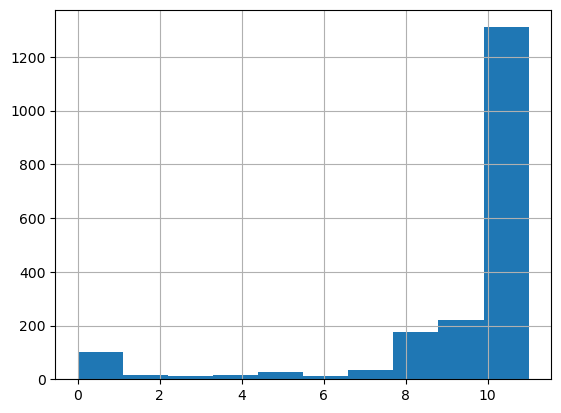

In [11]:
#Calculate the mean, median, and standard deviation of this feature.
print(df['NPS Score'].apply(['mean','median','std']))
df['NPS Score'].hist()

mean       8.872407
median    10.000000
std        2.468548
Name: NPS Score, dtype: float64


<Axes: >

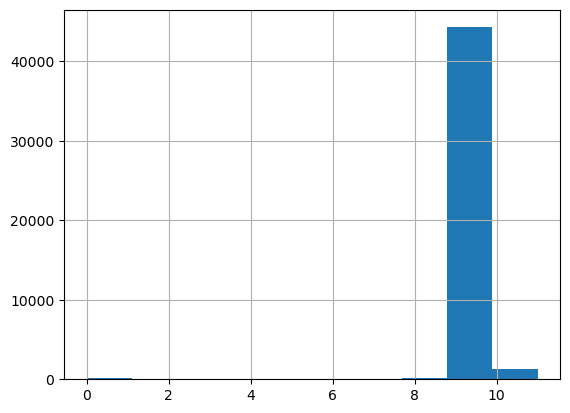

In [18]:
#Fill missing value in NPS score using mean
#Then recalculate the mean, median, and std and replot the histogram.

df_NPS_Score= df['NPS Score'].fillna(value=df['NPS Score'].mean())
print(df['NPS Score'].apply(['mean','median','std']))
df_NPS_Score.hist()

mean       8.872407
median    10.000000
std        2.468548
Name: NPS Score, dtype: float64


<Axes: >

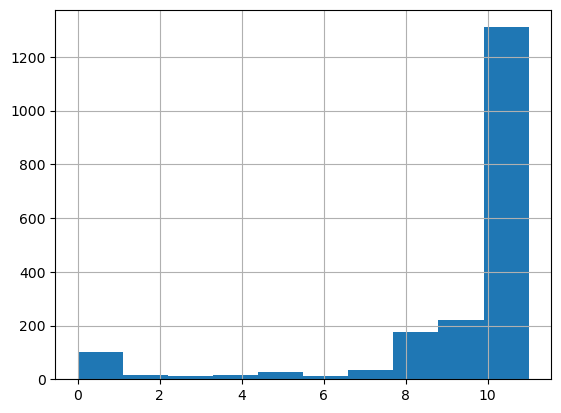

In [16]:
#drop all of the rows that are missing an NPS score value
df_NPS_score= df[~df['NPS Score'].isnull()]['NPS Score']
print(df_NPS_score.apply(['mean','median','std']))
df_NPS_score.hist()
